<a href="https://colab.research.google.com/github/Aadish1206/Codsoft/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## Import necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib


## Load the training and test datasets from URLs

In [ ]:

train_url = '/content/fraudTrain.csv'
test_url = '/content/fraudTest.csv'
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)


## Basic data exploration for training data

In [ ]:

print("Training Dataset shape:", train_data.shape)
print("Training Dataset info:\n", train_data.info())
print("Training Dataset description:\n", train_data.describe())


Training Dataset shape: (31151, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31151 non-null  int64  
 1   trans_date_trans_time  31151 non-null  object 
 2   cc_num                 31151 non-null  int64  
 3   merchant               31151 non-null  object 
 4   category               31151 non-null  object 
 5   amt                    31151 non-null  float64
 6   first                  31151 non-null  object 
 7   last                   31151 non-null  object 
 8   gender                 31151 non-null  object 
 9   street                 31151 non-null  object 
 10  city                   31150 non-null  object 
 11  state                  31150 non-null  object 
 12  zip                    31150 non-null  float64
 13  lat                    31150 non-null  float64
 14  long              

## Basic data exploration for test data

In [ ]:

print("Test Dataset shape:", test_data.shape)
print("Test Dataset info:\n", test_data.info())
print("Test Dataset description:\n", test_data.describe())


Test Dataset shape: (31124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31124 non-null  int64  
 1   trans_date_trans_time  31124 non-null  object 
 2   cc_num                 31123 non-null  float64
 3   merchant               31123 non-null  object 
 4   category               31123 non-null  object 
 5   amt                    31123 non-null  float64
 6   first                  31123 non-null  object 
 7   last                   31123 non-null  object 
 8   gender                 31123 non-null  object 
 9   street                 31123 non-null  object 
 10  city                   31123 non-null  object 
 11  state                  31123 non-null  object 
 12  zip                    31123 non-null  float64
 13  lat                    31123 non-null  float64
 14  long                  

## Check for missing values in training data

In [ ]:

print("Missing values in training data:\n", train_data.isnull().sum())


Missing values in training data:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


## Check for missing values in test data

In [ ]:

print("Missing values in test data:\n", test_data.isnull().sum())


Missing values in test data:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


## Additional data exploration - Display the first few rows of the training dataset

In [ ]:

print("First few rows of the training dataset:")
print(train_data.head())


First few rows of the training dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      

## Additional data exploration - Display the first few rows of the test dataset

In [ ]:

print("First few rows of the test dataset:")
print(test_data.head())


First few rows of the test dataset:
   Unnamed: 0 trans_date_trans_time        cc_num  \
0           0   2020-06-21 12:14:25  2.291164e+15   
1           1   2020-06-21 12:14:33  3.573030e+15   
2           2   2020-06-21 12:14:53  3.598215e+15   
3           3   2020-06-21 12:15:15  3.591920e+15   
4           4   2020-06-21 12:15:17  3.526826e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  .

## Check the distribution of 'Amount' before scaling in training data

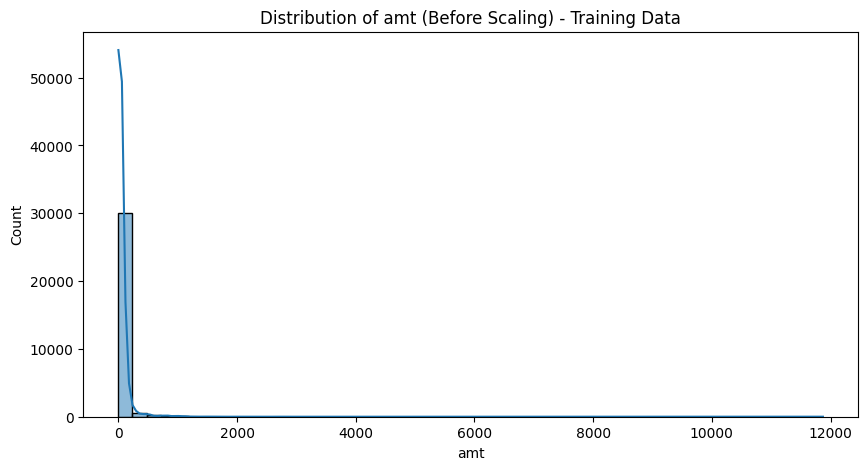

In [ ]:
if 'amt' in train_data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data['amt'], bins=50, kde=True)
    plt.title('Distribution of amt (Before Scaling) - Training Data')
    plt.show()
else:
    print("Column 'amt' not found in training data")


## Scale the 'Amount' feature in training data

In [ ]:
if 'amt' in train_data.columns:
    sc = StandardScaler()
    train_data['amt'] = sc.fit_transform(train_data[['amt']])
else:
    print("Column 'amt' not found in training data")


## Scale the 'Amount' feature in test data

In [ ]:
if 'amt' in test_data.columns:
    test_data['amt'] = sc.transform(test_data[['amt']])
else:
    print("Column 'amt' not found in test data")


## Check the distribution of 'Amount' after scaling in training data

In [ ]:
if 'Amount' in test_data.columns:
    test_data['Amount'] = sc.transform(pd.DataFrame(test_data['Amount']))
else:
    print("Column 'Amount' not found in test data")


Column 'Amount' not found in test data


In [ ]:
if 'Amount' in train_data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data['Amount'], bins=50, kde=True)
    plt.title('Distribution of Amount (After Scaling) - Training Data')
    plt.show()
else:
    print("Column 'Amount' not found in training data")


Column 'Amount' not found in training data


## Drop the 'Time' column in training data

In [ ]:
if 'Time' in train_data.columns:
    train_data = train_data.drop(['Time'], axis=1)
else:
    print("Column 'Time' not found in training data")


Column 'Time' not found in training data


## Drop the 'Time' column in test data

In [ ]:
if 'Time' in test_data.columns:
    test_data = test_data.drop(['Time'], axis=1)
else:
    print("Column 'Time' not found in test data")


Column 'Time' not found in test data


## Handle duplicates in training data

In [ ]:

train_data = train_data.drop_duplicates()
print("Training dataset shape after dropping duplicates:", train_data.shape)


Training dataset shape after dropping duplicates: (31151, 23)


## Handle duplicates in test data

In [ ]:

test_data = test_data.drop_duplicates()
print("Test dataset shape after dropping duplicates:", test_data.shape)


Test dataset shape after dropping duplicates: (31124, 23)


## Visualize class distribution in training data

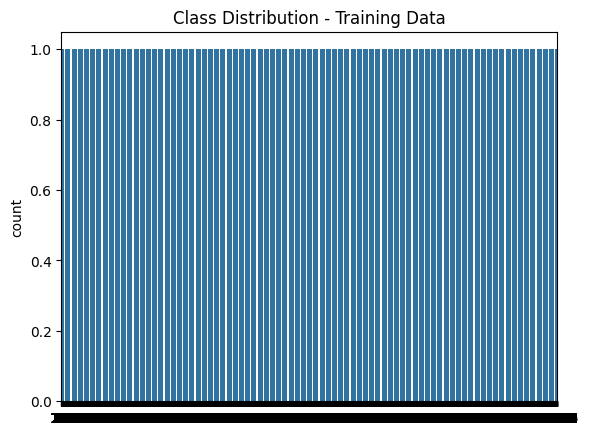

In [ ]:
if 'is_fraud' in train_data.columns:
    sample_train_data = train_data.sample(n=10000, random_state=42)
    sns.countplot(sample_train_data['is_fraud'])
    plt.title('Class Distribution - Training Data')
    plt.show()
else:
    print("Column 'is_fraud' not found in training data")


## Define features and target variable for training data

In [ ]:
drop_cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

if 'is_fraud' in train_data.columns and 'is_fraud' in test_data.columns:

    X_train = train_data.drop(columns=drop_cols + ['is_fraud'])
    y_train = train_data['is_fraud']

    X_test = test_data.drop(columns=drop_cols + ['is_fraud'])
    y_test = test_data['is_fraud']

    X_train = X_train.fillna(X_train.median())
    X_test = X_test.fillna(X_test.median())

    X_test = X_test[X_train.columns]

    if y_train.isnull().sum() > 0:
        print(f"Number of NaN values in 'is_fraud' in training data: {y_train.isnull().sum()}")
        y_train = y_train.fillna(y_train.mode()[0])
    if y_test.isnull().sum() > 0:
        print(f"Number of NaN values in 'is_fraud' in test data: {y_test.isnull().sum()}")
        y_test = y_test.fillna(y_test.mode()[0])
else:
    print("Column 'is_fraud' not found in training or test data")


Number of NaN values in 'is_fraud' in training data: 1
Number of NaN values in 'is_fraud' in test data: 1


## Define features and target variable for test data

In [ ]:
if 'is_fraud' in test_data.columns:
    X_test = test_data.drop('is_fraud', axis=1)
    y_test = test_data['is_fraud']
else:
    print("Column 'is_fraud' not found in test data")


## Handle class imbalance using SMOTE in training data

In [ ]:
if 'is_fraud' in train_data.columns:
    smote = SMOTE()
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
else:
    print("Column 'is_fraud' not found in training data")


## Function to train and evaluate models

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\\n{classification_report(y_test, y_pred)}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.9956625112453412
Confusion Matrix:\n[[30989     0]
 [  135     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:\n              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30989
         1.0       0.00      0.00      0.00       135

    accuracy                           1.00     31124
   macro avg       0.50      0.50      0.50     31124
weighted avg       0.99      1.00      0.99     31124



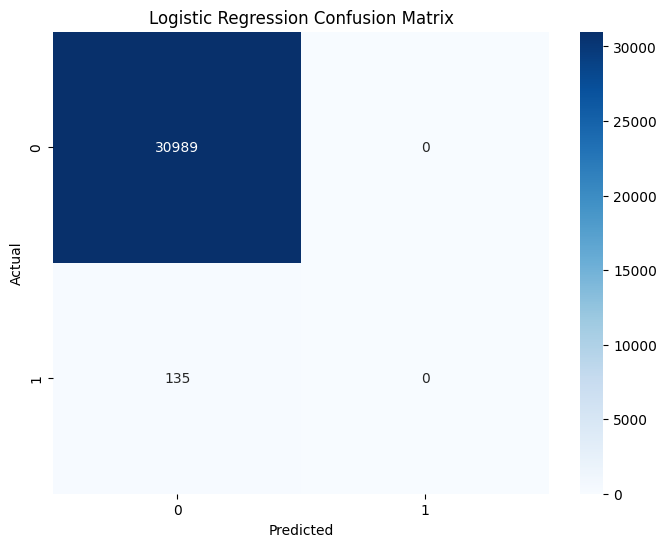

In [ ]:
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X_train_res, X_test, y_train_res, y_test, "Logistic Regression")


## Decision Tree Classifier

Model: Decision Tree Classifier
Accuracy: 0.9393394165274387
Confusion Matrix:\n[[29236  1753]
 [  135     0]]
Classification Report:\n              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     30989
         1.0       0.00      0.00      0.00       135

    accuracy                           0.94     31124
   macro avg       0.50      0.47      0.48     31124
weighted avg       0.99      0.94      0.96     31124



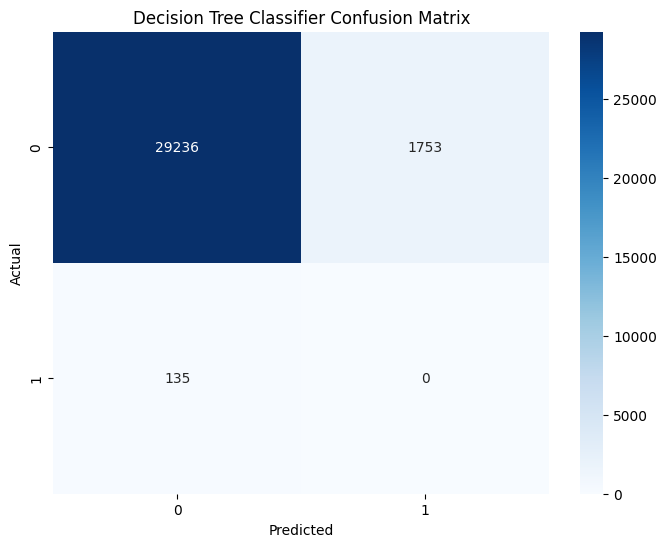

In [ ]:

dtc = DecisionTreeClassifier()
evaluate_model(dtc, X_train_res, X_test, y_train_res, y_test, "Decision Tree Classifier")


## Random Forest Classifier

Model: Random Forest Classifier
Accuracy: 0.9944094589384398
Confusion Matrix:\n[[30950    39]
 [  135     0]]
Classification Report:\n              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30989
         1.0       0.00      0.00      0.00       135

    accuracy                           0.99     31124
   macro avg       0.50      0.50      0.50     31124
weighted avg       0.99      0.99      0.99     31124



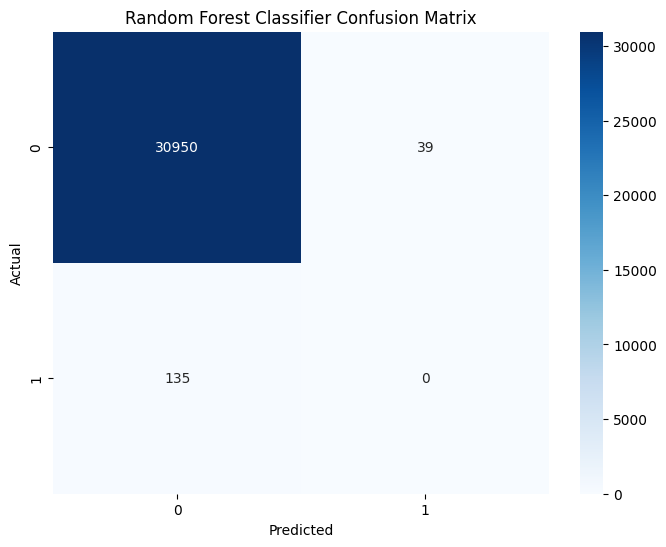

In [ ]:

rfc = RandomForestClassifier()
evaluate_model(rfc, X_train_res, X_test, y_train_res, y_test, "Random Forest Classifier")


## Save the best model (example: Random Forest)

In [ ]:

joblib.dump(rfc, "best_credit_card_fraud_model.pkl")


['best_credit_card_fraud_model.pkl']

## Load the model and make a prediction

In [ ]:
model = joblib.load("best_credit_card_fraud_model.pkl")

sample_data = X_test.iloc[0].values.reshape(1, -1)
pred = model.predict(sample_data)
print(f"Prediction for sample data: {'Fraudulent' if pred[0] == 1 else 'Legitimate'}")


Prediction for sample data: Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
